In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")

In [15]:
estimation_data_fp = "./All estimation raw data.csv"
data  = pd.read_csv(estimation_data_fp)

with pd.option_context('display.max_columns', None):
    display(data)

,SubjID,Location,Gender,Age,Set,Condition,GameID,Ha,pHa,La,LotShapeA,LotNumA,Hb,pHb,Lb,LotShapeB,LotNumB,Amb,Corr,Order,Trial,Button,B,Payoff,Forgone,RT,Apay,Bpay,Feedback,block
0,10100,Rehovot,M,28,1,ByProb,13,0,1.0,0,-,1,50,0.5,-50,-,1,0,0,1,1,L,1,50,0,NaN,0,50,0,1
1,10100,Rehovot,M,28,1,ByProb,13,0,1.0,0,-,1,50,0.5,-50,-,1,0,0,1,2,L,1,50,0,NaN,0,50,0,1
2,10100,Rehovot,M,28,1,ByProb,13,0,1.0,0,-,1,50,0.5,-50,-,1,0,0,1,3,L,1,-50,0,NaN,0,-50,0,1
3,10100,Rehovot,M,28,1,ByProb,13,0,1.0,0,-,1,50,0.5,-50,-,1,0,0,1,4,L,1,-50,0,NaN,0,-50,0,1
4,10100,Rehovot,M,28,1,ByProb,13,0,1.0,0,-,1,50,0.5,-50,-,1,0,0,1,5,L,1,-50,0,NaN,0,-50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510745,71109,Technion,M,24,7,ByProb,204,9,1.0,9,-,1,55,0.1,5,-,1,1,0,30,21,L,0,9,5,552.0,9,5,1,5
510746,71109,Technion,M,24,7,ByProb,204,9,1.0,9,-,1,55,0.1,5,-,1,1,0,30,22,L,0,9,5,355.0,9,5,1,5
510747,71109,Technion,M,24,7,ByProb,204,9,1.0,9,-,1,55,0.1,5,-,1,1,0,30,23,L,0,9,5,707.0,9,5,1,5
510748,71109,Technion,M,24,7,ByProb,204,9,1.0,9,-,1,55,0.1,5,-,1,1,0,30,24,L,0,9,5,493.0,9,5,1,5


In [16]:
irrational_decision = data[((data.Ha*data.pHa+data.La*(1-data.pHa))-(data.Hb*data.pHb+data.Lb*(1-data.pHb)))/(data.Hb*data.pHb+data.Lb*(1-data.pHb))>=0.3 and data.B==1].Button.count()
all_data=data.Ha.count()
print('There are {0} decisions whose choice（{1}%）'.format(irrational_decision,irrational_decision/all_data*100))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [9]:
LoseMoney = data[data.Forgone>data.Payoff].Forgone.count()
WinMoney = data[data.Forgone<data.Payoff].Forgone.count()
NeitherWinNorLose = data[data.Forgone==data.Payoff].Forgone.count()
print('There are {0} dicisions which payoff is larger than forgone({1}%)'.format(WinMoney,WinMoney/(WinMoney+LoseMoney+NeitherWinNorLose)*100))
print('There are {0} dicisions which payoff is smaller than forgone({1}%)'.format(LoseMoney,LoseMoney/(WinMoney+LoseMoney+NeitherWinNorLose)*100))
print('There are {0} dicisions which payoff is equal to forgone({1}%)'.format(NeitherWinNorLose,NeitherWinNorLose/(WinMoney+LoseMoney+NeitherWinNorLose)*100))

There are 289819 dicisions which payoff is larger than forgone(56.743808125305925%)
There are 191554 dicisions which payoff is smaller than forgone(37.50445423396965%)
There are 29377 dicisions which payoff is equal to forgone(5.751737640724425%)


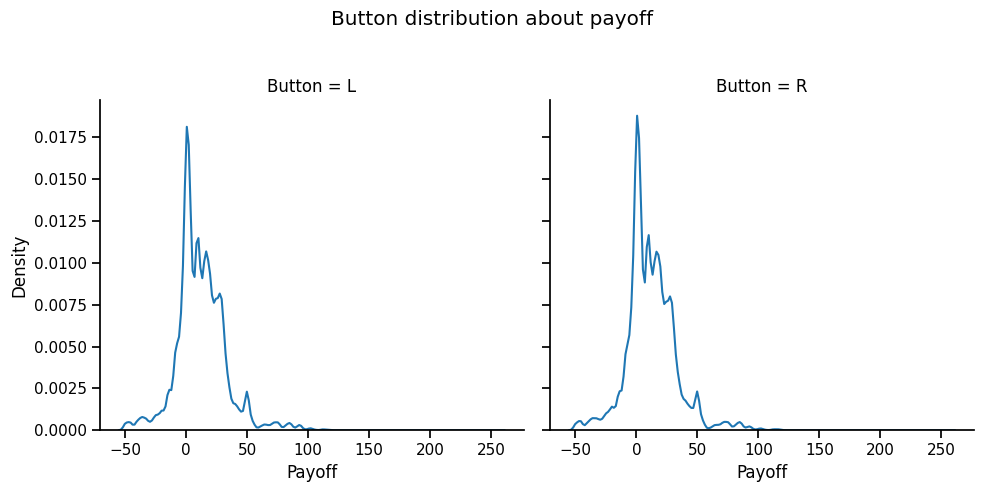

In [11]:
g = sns.displot(data=data, x="Payoff", col="Button", kind="kde")
_ = g.fig.subplots_adjust(top=0.8)
_ = g.fig.suptitle('Button distribution about payoff')

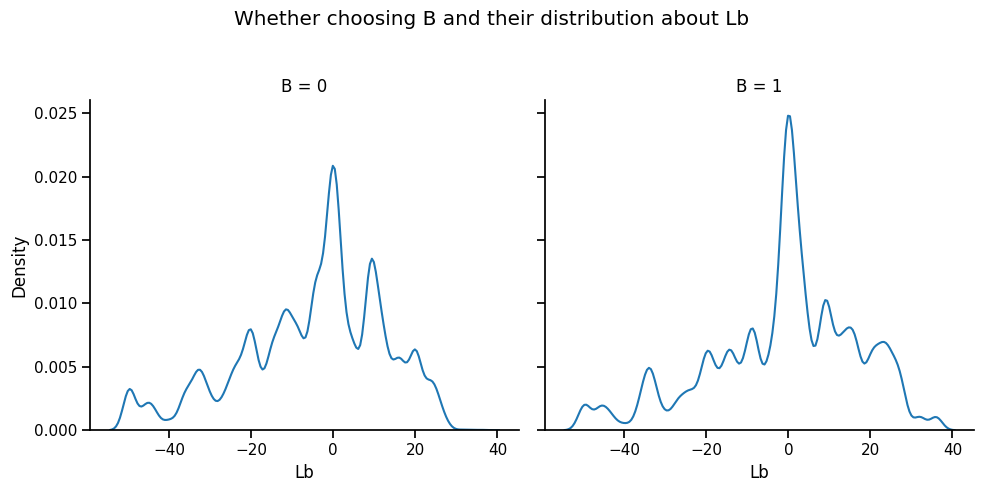

In [13]:
g = sns.displot(data=data, x="Lb", col="B", kind="kde")
_ = g.fig.subplots_adjust(top=0.8)
_ = g.fig.suptitle('Whether choosing B and their distribution about Lb')